# Apie dviračių nuomą

Šiais laikais dviračių nuomos sistema - narystė, nuoma ir grąžinimas tapo automatizuota. Vartotojai, naudodamiesi šia sistema lengvai gali išsinuomoti dviratį iš kažkurio punkto ir gražinti jį bet kuriame kitame punkte. Remiantis 2018-ųjų metų duomenimis, pasaulyje jau yra virš 600 dviračių nuomos programėlių, kurios nuomoja apie 650,000 dviračių. Ši statistika nuolatos auga, kadangi yra didelė dviračių paklausa - galima išvengti eismo spūsčių, dviračiai yra draugiški aplinkai, taip pat garantuoja fizinį aktyvumą.

### Atributų informacija

Duomenų bazė yra sudaryta remiantis 2015-ųjų, 2016-ųjų metų dviračių nuoma Londone. 

Duomenys sudaryti iš 10 stulpelių:

* "timestamp" - duomenų grupavimo laikas (dienos, valandos)
* "cnt" - išnuomotų dviračių skaičius
* "t1" - temperatūra 
* "t2" - jutiminė temperatūra
* "hum" - drėgnumas (procentais)
* "wind_speed" - vėjo greitis km/h
* "weather_code" - (oro kategorija)$^*$
* "is_holiday" - Boolean funkcija (1 atostogos / 0 ne atostogos)
* "is_weekend" - Boolean funkcija (1 savaitgalis / 0 darbo diena)
* "season" - 0 - pavasaris; 1 - vasara; 2 - ruduo; 3 - žiema

$^*$ 
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn import svm
from sklearn import neighbors
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression




In [3]:
df = pd.read_csv('C:/Users/MartynasS/Desktop/Strukturos/strukturos/london_merged.csv')

df.columns = ['timestamp','cnt','t1','t2','hum','wind_speed','weather_code','is_holiday','is_weekend','season']
column = ['cnt']
test = df.drop(column, axis=1)

columns1 = ['cnt','t1','t2','hum','wind_speed','weather_code','is_holiday','is_weekend','season']
pred = df.drop(columns1, axis=1)
pred['cnt'] = '0'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
timestamp       17414 non-null object
cnt             17414 non-null int64
t1              17414 non-null float64
t2              17414 non-null float64
hum             17414 non-null float64
wind_speed      17414 non-null float64
weather_code    17414 non-null float64
is_holiday      17414 non-null float64
is_weekend      17414 non-null float64
season          17414 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
df.isnull().any()

timestamp       False
cnt             False
t1              False
t2              False
hum             False
wind_speed      False
weather_code    False
is_holiday      False
is_weekend      False
season          False
dtype: bool

In [6]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [7]:
test.head()

,timestamp,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [8]:
pred.head()

,timestamp,cnt
0,2015-01-04 00:00:00,0
1,2015-01-04 01:00:00,0
2,2015-01-04 02:00:00,0
3,2015-01-04 03:00:00,0
4,2015-01-04 04:00:00,0


In [9]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


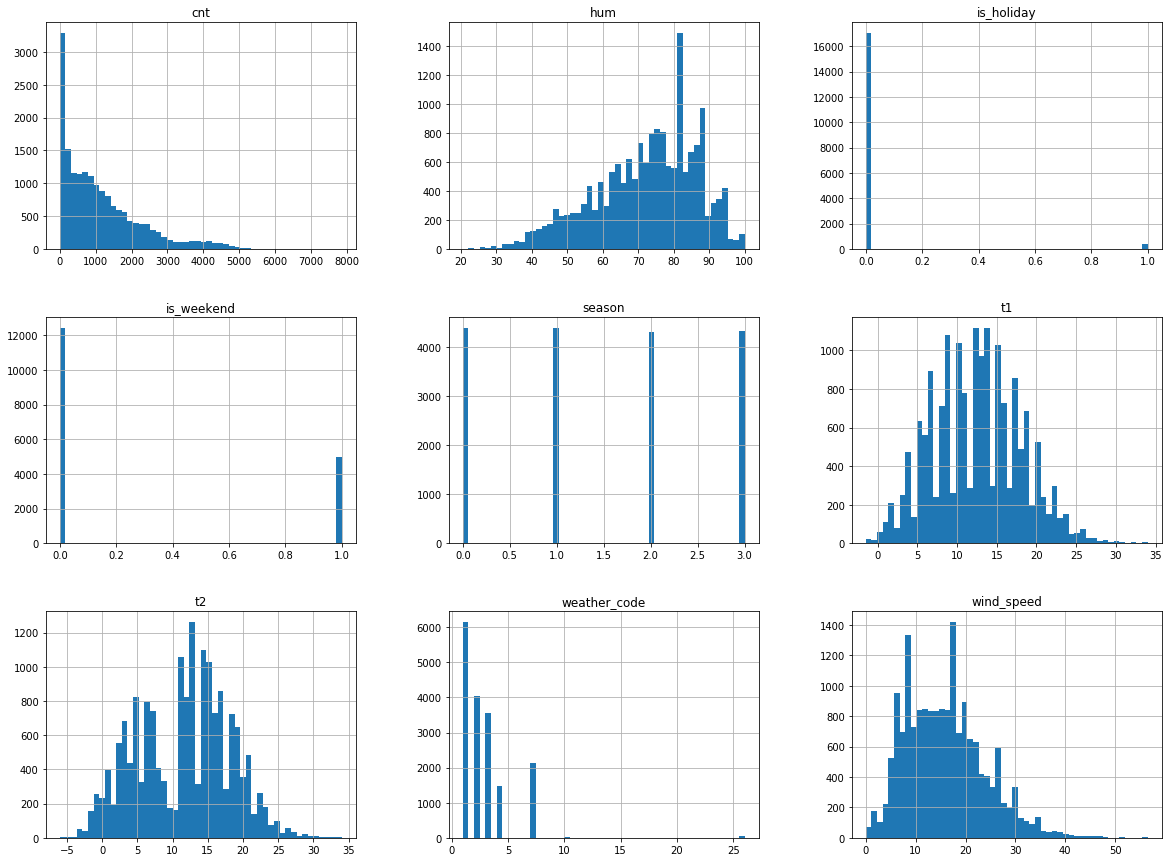

In [10]:
df.hist(bins=50, figsize=(20,15))
plt.show()

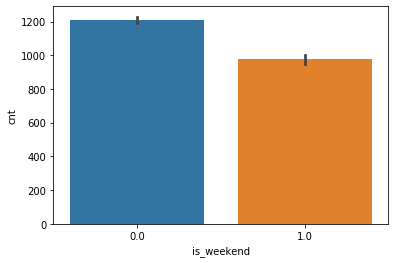

In [11]:
sns.barplot(x=df['is_weekend'],y=df['cnt'])

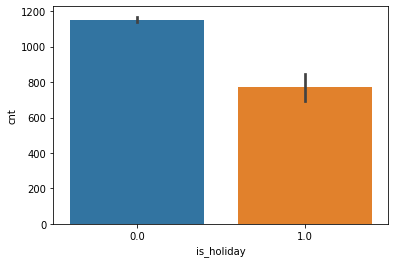

In [12]:
sns.barplot(x=df['is_holiday'],y=df['cnt'])

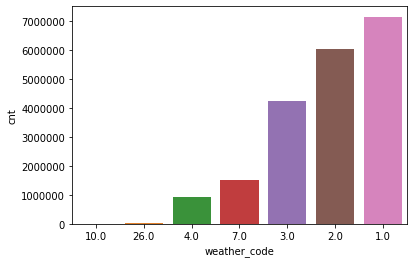

In [13]:
ax=df['cnt'].groupby([df['weather_code']]).sum()
ax.index
d=ax.reset_index()
s=d.sort_values(by=['cnt'])
sns.barplot(x=s['weather_code'],y=s['cnt'],order=s['weather_code'])

In [14]:
mae_example = pd.DataFrame({"TrueValue":[10,10,25],"Prediction":[5,15,5]})
mae_example["Error"] = mae_example.TrueValue - mae_example.Prediction
mae_example["AbsoluteError"] = np.abs(mae_example["Error"])
mae_example

,TrueValue,Prediction,Error,AbsoluteError
0,10,5,5,5
1,10,15,-5,5
2,25,5,20,20


In [15]:
sum_of_absolute_errors = mae_example.AbsoluteError.sum()
print("Sum of absolute errors:" +str(sum_of_absolute_errors))
number_of_observations = mae_example.AbsoluteError.count()
print("Number of observations:" +str(number_of_observations))

Sum of absolute errors:30
Number of observations:3


In [16]:
mean_of_absolute_errors = sum_of_absolute_errors / number_of_observations
mean_of_absolute_errors

10.0

In [17]:
df = pd.concat([df, test], sort = False)

In [18]:
df.timestamp = pd.to_datetime(df.timestamp)

In [19]:
df["hour"] = df.timestamp.dt.hour
df["day"] = df.timestamp.dt.day
df["dow"] = df.timestamp.dt.weekday
df["week"] = df.timestamp.dt.week
df["month"] = df.timestamp.dt.month
df["year"] = df.timestamp.dt.year

In [20]:
df.head(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day,dow,week,month,year
0,2015-01-04 00:00:00,182.0,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1,1,2015
1,2015-01-04 01:00:00,138.0,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1,1,2015
2,2015-01-04 02:00:00,134.0,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1,1,2015
3,2015-01-04 03:00:00,72.0,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1,1,2015
4,2015-01-04 04:00:00,47.0,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1,1,2015
5,2015-01-04 05:00:00,46.0,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0,5,4,6,1,1,2015
6,2015-01-04 06:00:00,51.0,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0,6,4,6,1,1,2015
7,2015-01-04 07:00:00,75.0,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0,7,4,6,1,1,2015
8,2015-01-04 08:00:00,131.0,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0,8,4,6,1,1,2015
9,2015-01-04 09:00:00,301.0,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0,9,4,6,1,1,2015


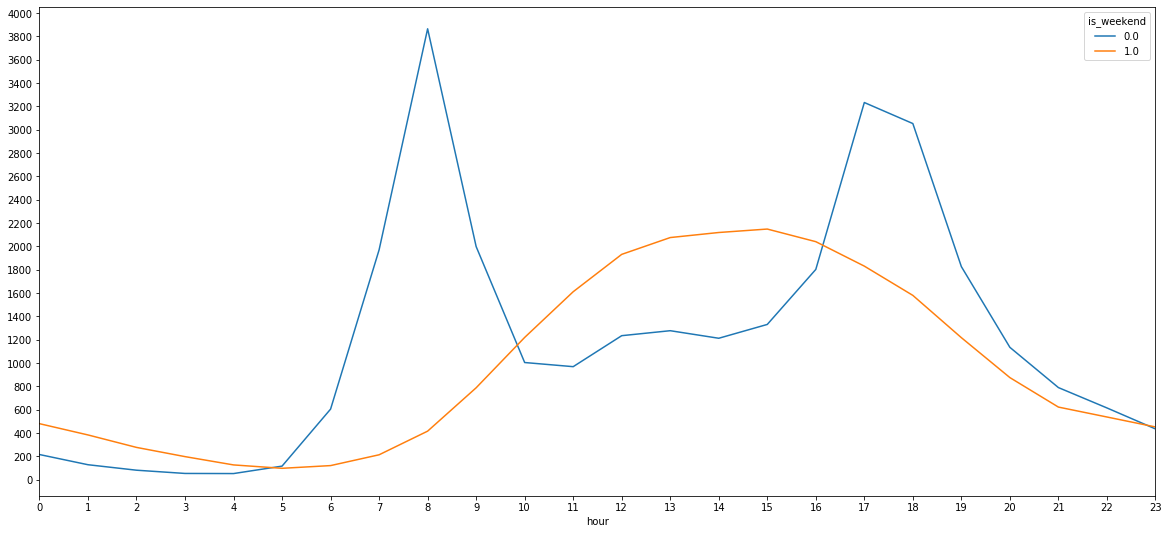

In [21]:
df[df.cnt.notnull()].groupby(["hour","is_weekend"]).cnt.mean().unstack().plot(figsize=(20,9), 
                                                                              xticks=range(0,24),yticks=range(0,4001,200))

In [22]:
train = df[df.cnt.notnull()]
y_train = train.cnt
x_train = train.drop(["timestamp","cnt"],axis=1)
x_test = df[df.cnt.isnull() & df.timestamp.isin(test.timestamp)].drop(["timestamp","cnt"], axis=1) 

In [23]:
train1 = df[df.cnt.notnull()]
train0 =  train1.drop(["timestamp"],axis=1)
train0.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day,dow,week,month,year
0,182.0,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1,1,2015
1,138.0,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1,1,2015
2,134.0,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1,1,2015
3,72.0,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1,1,2015
4,47.0,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1,1,2015


In [24]:
mean_by_weekend_hour = train.groupby(["is_weekend","hour"]).cnt.mean()
joined = x_test.join(mean_by_weekend_hour, on = ["is_weekend","hour"], how = "left")
joined.head(48)

,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day,dow,week,month,year,cnt
0,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1,1,2015,479.810680
1,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1,1,2015,383.262136
2,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1,1,2015,276.441176
3,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1,1,2015,197.434146
4,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1,1,2015,126.336585
5,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0,5,4,6,1,1,2015,97.253659
6,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0,6,4,6,1,1,2015,120.555556
7,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0,7,4,6,1,1,2015,213.183575
8,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0,8,4,6,1,1,2015,415.786408
9,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0,9,4,6,1,1,2015,787.391304


In [25]:
np.random.seed(42)
mask = np.random.rand(train0.shape[0]) <= 0.7

print('Train set shape {0}, test set shape {1}'.format(train0[mask].shape, train0[~mask].shape))

Train set shape (12268, 15), test set shape (5146, 15)


In [26]:
lr = LinearRegression()
lr.fit(train0[mask].drop(['cnt'], axis=1),  
       train0[mask]['cnt'])         

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
pred = lr.predict(train0[~mask].drop(['cnt'], axis=1))   
print('RMSE = {0:.02f}'.format(
    np.sqrt(np.mean((pred - train0[~mask]['cnt'])**2))))

RMSE = 896.81


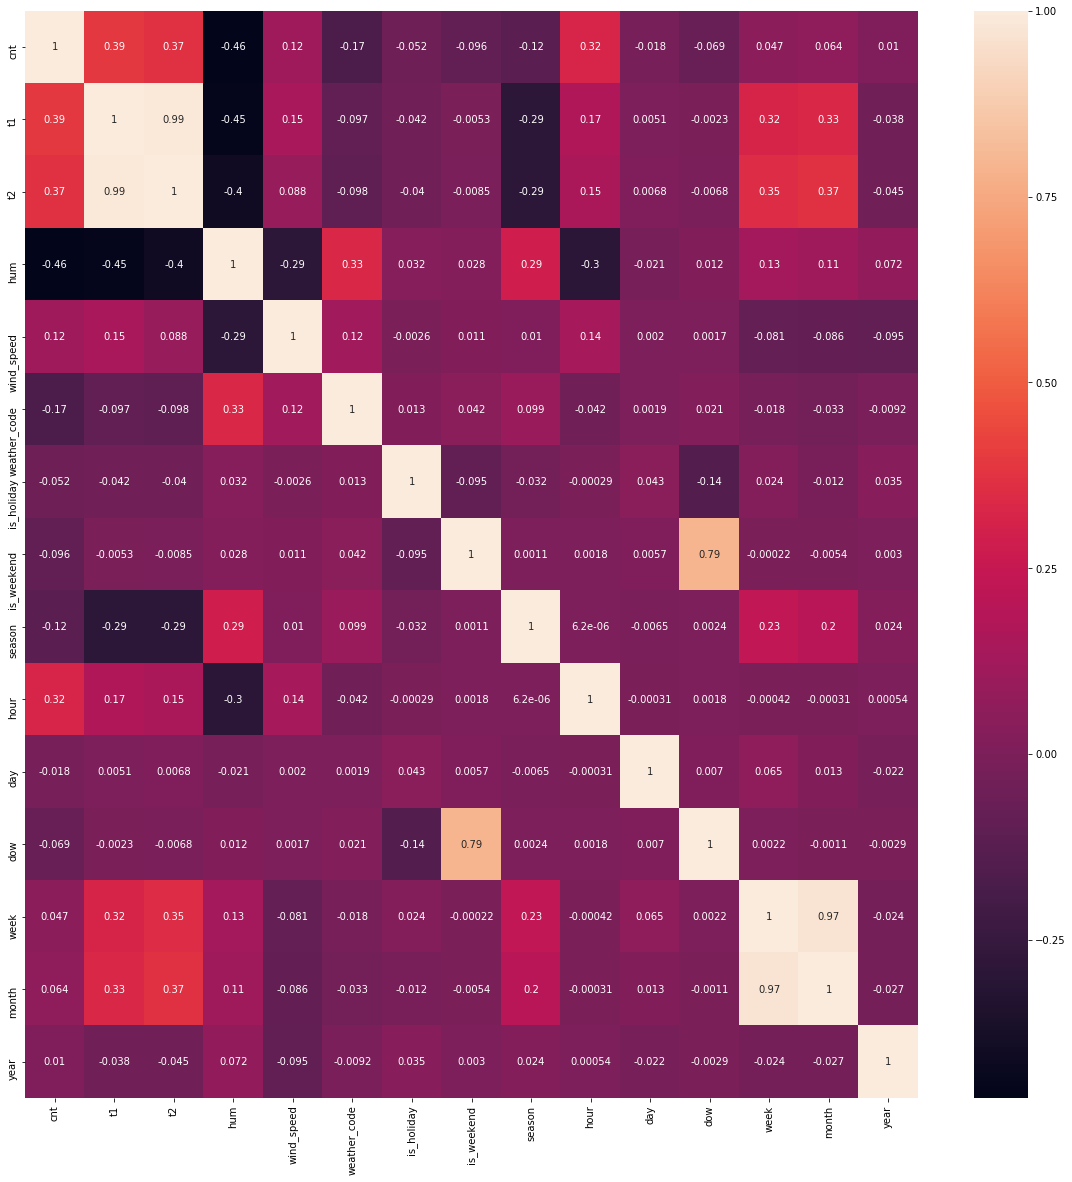

In [28]:
corrmat = df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(corrmat, vmax=1, annot=True);

In [30]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(train0[mask].drop(['cnt'], axis=1),
       train0[mask]['cnt'])
pred = rf.predict(train0[~mask].drop(['cnt'], axis=1))
print('RMSE = {0:.02f}'.format(np.sqrt(np.mean((pred - train0[~mask]['cnt'])**2))))

RMSE = 215.69
